## **IHSG Prediction**

### **A. Introduction**

- **Name**  : Livia Amanda Annafiah
- **Dataset** : JKSE

---------------------

**Problem Statement**

The Indonesia Stock Exchange Composite Index (IHSG) is an important indicator of how well the country's economy is doing and how people feel about the market. One of the main issues is accurately guessing what the IHSG will be in the future. This is crucial for helping investors and people involved in the market make good choices and plans.

**Objective**

The aim of this project is to create a predictive model using `LSTM` or `Long Short Term Memory` that can forecast the Indonesia Stock Exchange Composite Index (IHSG) scores for future periods. This is important because it helps in making smart decisions and strategies based on market trends, economic conditions, and investment possibilities. The evaluation metric for evaluating model performance is `MAE`, `MSE`, `RMSE`, and `R2 Score`.

### **B. Libraries**

In [ ]:
# Import libraries for operations and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries for model creation
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM,  GRU

# Import libraries for model evaluation
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### **C. Data Loading**

In [ ]:
# Load the data
df = pd.read_csv('JKSE.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-06,7252.084961,7331.081055,7248.527832,7329.800781,7329.800781,180285900.0
1,2024-03-07,7338.731934,7386.874023,7334.308105,7373.963867,7373.963867,193312700.0
2,2024-03-08,7398.429199,7416.433105,7376.155762,7381.907227,7381.907227,125243200.0
3,2024-03-13,7422.301758,7441.616211,7392.011230,7421.207031,7421.207031,135225800.0
4,2024-03-14,7405.566895,7454.448242,7380.647949,7433.314941,7433.314941,129206200.0
5,2024-03-15,7408.658203,7416.338867,7308.035156,7328.054199,7328.054199,231480500.0
6,2024-03-18,7338.076172,7358.550781,7300.940918,7302.449219,7302.449219,155334600.0
7,2024-03-19,7320.538086,7361.529785,7314.180176,7336.746094,7336.746094,137594400.0
8,2024-03-20,7303.929199,7343.459961,7295.350098,7331.127930,7331.127930,169731600.0
9,2024-03-21,7360.558105,7396.471191,7336.595215,7338.353027,7338.353027,139792200.0


### **D. Data Cleaning**

In [ ]:
# Remove rows with missing values
df = df.dropna()

In [ ]:
# Check missing values after handling
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Select necessary columns
df = df[['Close', 'Date']]

# Convert datatypes to datetime and set to index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Show last 5 data
df.tail()

,Close
Date,
2024-04-26,7036.075195
2024-04-29,7155.784180
2024-04-30,7234.196777
2024-05-02,7117.424805
2024-05-06,7135.890137


### **E. Exploratory Data Analysis**

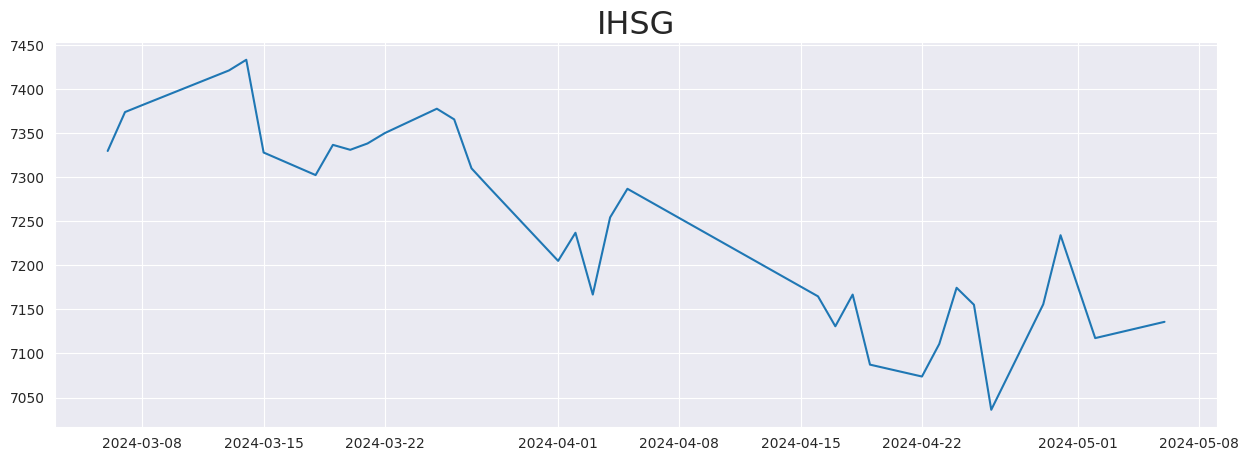

In [ ]:
# Show time series of the data
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df.index, df['Close'])
plt.title("IHSG", fontsize=23)
plt.show()

### **F. Feature Engineering**

#### **i. Feature Scaling**

In [ ]:
# Scale the close column
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

#### **ii. Split Train-Test Set**

In [ ]:
# Split train test set using 80-20 ratio
train_size = 0.8
size = int(len(df) * train_size)
train, test = df.iloc[0:size], df.iloc[size:len(df)]

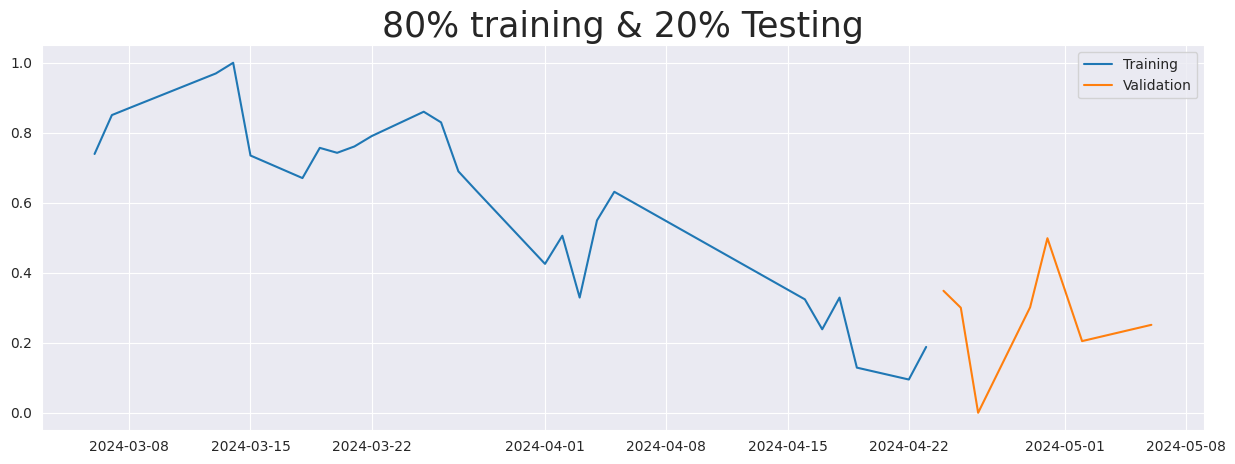

In [ ]:
# Show graph for the splitted train-test
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)
plt.legend(labels=['Training', 'Validation'])
plt.title('80% training & 20% Testing', fontsize=25)
plt.show()

#### **iii. Split Feature and Target Variable**

In [ ]:
# Define function to split feature and target
def split_target(df, look_back=1):
    X, y = [], []
    for i in range(len(df) - look_back):
        a = df[i:(i + look_back), 0]
        X.append(a)
        y.append(df[i + look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
# Split the training and testing data into features and target variables
X_train, y_train = split_target(train.values.reshape(len(train), 1))
X_test, y_test = split_target(test.values.reshape(len(test), 1))

In [ ]:
# Reshape the input features for compatibility with LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

### **G. Model Definition**

In [ ]:
# Define model using LSTM
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(1,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])

### **H. Model Training**

### **I. Model Evaluation**

In [ ]:
# Train data using the defined model
history = model.fit(X_train,
                    y_train,
                    epochs=2000,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/2000
1/1 [==============================] - 11s 11s/step - loss: 0.4241 - mean_squared_error: 0.4241 - val_loss: 0.0850 - val_mean_squared_error: 0.0850
Epoch 2/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.4145 - mean_squared_error: 0.4145 - val_loss: 0.0810 - val_mean_squared_error: 0.0810
Epoch 3/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.4049 - mean_squared_error: 0.4049 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 4/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.3951 - mean_squared_error: 0.3951 - val_loss: 0.0732 - val_mean_squared_error: 0.0732
Epoch 5/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.3853 - mean_squared_error: 0.3853 - val_loss: 0.0693 - val_mean_squared_error: 0.0693
Epoch 6/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.3753 - mean_squared_error: 0.3753 - val_loss: 0.0655 - val_mean_squared_error: 0.0655
Epoch 7/2000
1/1 [================

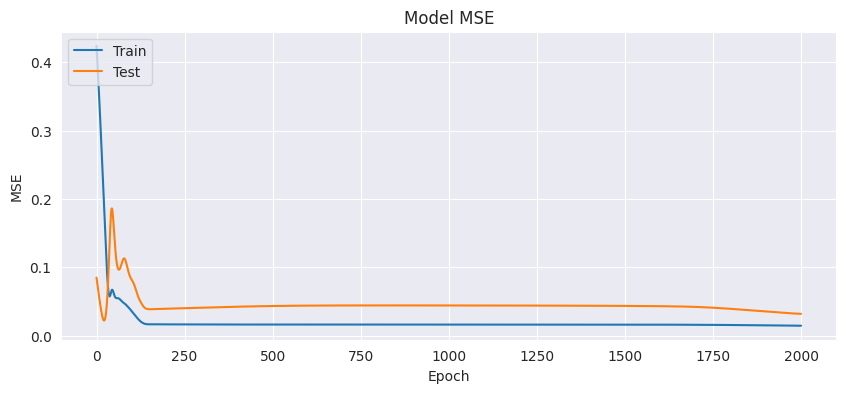

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Inverse transform y_test
y_test_inversed = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Generate predictions for the test data
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred).flatten()

1/1 [==============================] - 2s 2s/step


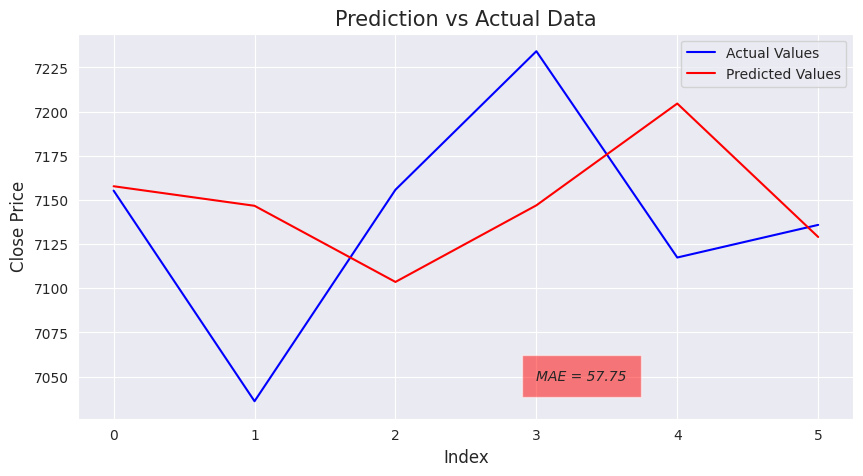

In [ ]:
# Create figure
plt.figure(figsize=(10, 5))

# Plot the actual values
plt.plot(y_test_inversed, label='Actual Values', color='blue')

# Plot the predicted values
plt.plot(y_pred, label='Predicted Values', color='red')

# Calculate Mean Absolute Error
mae_value = mean_absolute_error(y_test_inversed, y_pred)

# Get current axis of the plot
ax = plt.gca()

# Determine a suitable position for the text box based on plot dimensions
x_pos = len(y_pred) * 0.5
y_min, y_max = ax.get_ylim()
y_pos = y_min + (y_max - y_min) * 0.1

# Add a text box for the Mean Absolute Error
plt.text(x_pos, y_pos, f"MAE = {mae_value:.2f}", style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Set title and show the legend
plt.title('Prediction vs Actual Data', fontsize=15)
plt.legend()

# Label axes
plt.xlabel('Index', fontsize=12)
plt.ylabel('Close Price', fontsize=12)

plt.show()

In [ ]:
# Print the evaluation metrics score
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_inversed,y_pred)))
print("Test data MSE: ", mean_squared_error(y_test_inversed,y_pred))
print("Test data MAE: ", mean_absolute_error(y_test_inversed,y_pred))
print("Test data R2 score:", r2_score(y_test_inversed, y_pred))

Test data RMSE:  70.97006560605412
Test data MSE:  5036.750212127626
Test data MAE:  57.752034598957984
Test data R2 score: -0.46146462417484635


### **J. Predict Future Stock Value**

In [ ]:
# Convert target date to datetime
target_date = pd.to_datetime('2024-05-13')

# Prepare the input data for prediction
last_7_days = df['Close'].tail(7).values.reshape(-1, 1)
last_7_days_df = pd.DataFrame(last_7_days, columns=['Close'])

# Scale the last 7 days
scaled_last_7_days = scaler.transform(last_7_days_df)

# Reshape the data to match the model's input shape
X_pred = scaled_last_7_days.reshape(1, 7, 1)

# Make the prediction
predicted_scaled_price = model.predict(X_pred)

# Inverse transform the predicted value to get the actual stock price
predicted_price = scaler.inverse_transform(predicted_scaled_price)

# Print the predicted result
print(f"Predicted stock price for {target_date.date()}: {predicted_price[0][0]:.2f}")

1/1 [==============================] - 2s 2s/step
Predicted stock price for 2024-05-13: 7076.53



The forecasted stock price for May 13th, 2024, is **7076.53**.